In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("radiationPatterns.txt","r") as f:
    radpatfile_lineslist_asString = f.readlines()
    
# make sure you submit lines with number arrays here, not the index lines
def getarray_from_radpatfile(lineslistfromradpatfile, linenum_0indexed):
    # last element is a newline, that's why the list goes up to -1
    return np.array([float(i) for i in lineslistfromradpatfile[linenum_0indexed].split(" ")[:-1]])

In [3]:
defaultrear_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 1)
defaultrear_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 2)
defaultrear_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 3)
defaultrear_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 4)
defaultrear_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 5)

LbSedan1_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 7)
LbSedan1_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 8)
LbSedan1_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 9)
LbSedan1_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 10)
LbSedan1_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 11)

HbSedan1_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 13)
HbSedan1_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 14)
HbSedan1_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 15)
HbSedan1_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 16)
HbSedan1_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 17)

LbSedan2_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 19)
LbSedan2_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 20)
LbSedan2_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 21)
LbSedan2_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 22)
LbSedan2_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 23)

HbSedan2_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 25)
HbSedan2_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 26)
HbSedan2_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 27)
HbSedan2_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 28)
HbSedan2_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 29)

LbSuv1_patternL_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 31)
LbSuv1_patternR_flat         = getarray_from_radpatfile(radpatfile_lineslist_asString, 32)
LbSuv1_anglesL_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 33)
LbSuv1_anglesR_flat          = getarray_from_radpatfile(radpatfile_lineslist_asString, 34)
LbSuv1_spectralEmission_flat = getarray_from_radpatfile(radpatfile_lineslist_asString, 35)

In [4]:
irradPhi = [0.1, -0.5]
irradTheta = [0.1, -0.1]
angles  = HbSedan1_anglesL_flat
pattern = HbSedan1_patternL_flat

In [5]:
def getpatternval(irradPhi, irradTheta):
    indexPhi   = (np.round((irradPhi - angles[0]) / angles[2])).astype(int)
    indexTheta = (np.round((irradTheta - angles[3]) / angles[5])).astype(int)
    rowLength  = (np.round((angles[1] - angles[0] + angles[2]) / angles[2])).astype(int)
    indexFlat  = (rowLength * indexTheta) + indexPhi
    value      = pattern[indexFlat]
    return value

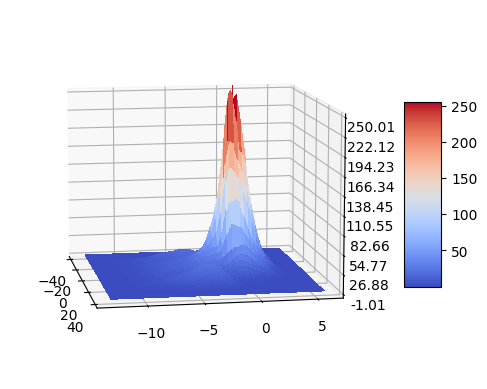

In [7]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Make data.
X = np.arange(angles[0], angles[1], angles[2])
Y = np.arange(angles[3], angles[4], angles[5])
X, Y = np.meshgrid(X, Y)
Z = getpatternval(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 250.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(elev=30., azim=40)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()

for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    plt.savefig("movie%d.png" % ii)